In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/UserName/Desktop/2-2학기/소웨/fruit.csv")

In [23]:
data

,이름,당도,아삭함
0,오렌지,7,3
1,포도,8,5
2,견과류,3,6
3,새우,2,3
4,생선,3,1
5,콩,3,7
6,베이컨,1,4
7,바나나,10,1
8,배,10,7
9,오이,2,8


In [19]:
kmeans = KMeans(n_clusters = 3)# 모델 생성

In [20]:
x = data[['당도', '아삭함']]

In [21]:
kmeans.fit(x)

KMeans(n_clusters=3)

<h2>Elbow 구하기</h2>

c:\new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


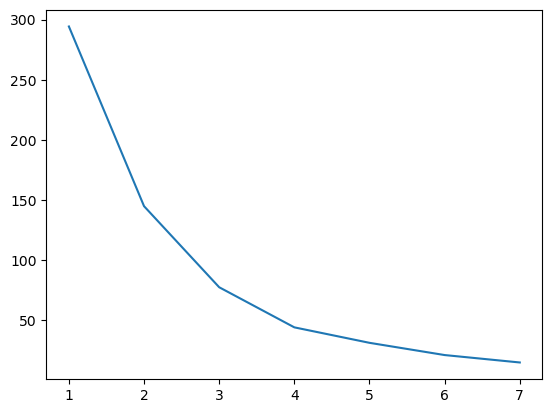

In [24]:
temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

<h2>K-Means 하기</h2>

In [25]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [26]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(x)

cluster[2 2 1 0 0 1 0 2 2 1 1 1 2 1 1]
중심점: [[2.         2.66666667]
 [2.71428571 8.28571429]
 [9.         5.        ]]
응집도: 77.52380952380953


-77.52380952380953

<h2>KNN 하기</h2>

In [28]:
data2 = pd.read_csv("C:/Users/UserName/Desktop/2-2학기/소웨/fruit.csv")

In [29]:
data2.head()

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질


In [33]:
data2

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2['종류']=le.fit_transform(data2['종류'])

In [42]:
data2['종류']

0     0
1     0
2     1
3     1
4     1
5     2
6     1
7     0
8     0
9     2
10    1
11    2
12    0
13    2
14    2
Name: 종류, dtype: int32

In [39]:
x = data2[['당도', '아삭함']]
y = data2['종류']

In [43]:
x.head()

,당도,아삭함
0,7,3
1,8,5
2,3,6
3,2,3
4,3,1


In [44]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: 종류, dtype: int32

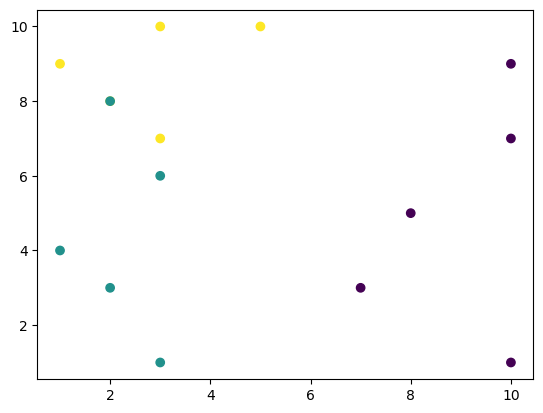

[(7, 3), (8, 5), (3, 6), (2, 3), (3, 1), (3, 7), (1, 4), (10, 1), (10, 7), (2, 8), (2, 8), (5, 10), (10, 9), (3, 10), (1, 9)]


In [49]:
x_1 = data2['당도']
x_2 = data2['아삭함']
classes = y
plt.style.use('default')
plt.scatter(x_1, x_2, c=classes)
plt.show()
data = list(zip(x_1, x_2))
print(data)

In [50]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 42)

In [46]:
train_target.head()

5     2
8     0
2     1
1     0
14    2
Name: 종류, dtype: int32

In [45]:
train_input.head()

,당도,아삭함
5,3,7
8,10,7
2,3,6
1,8,5
14,1,9


In [54]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

c:\new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0